# Introduction

First, download and unzip the following shape files manually from this website:

*  Places
*  Railways

Second, create a clear and documented script that:

*    Selects the "industrial" (type == "industrial") railways
*    Buffers the "industrial" railways with a buffer of 1000m (hint: st_buffer)
*    Find the place (i.e. a city) that intersects with this buffer.
*    Create a plot that shows the buffer, the points, and the name of the city
*    Write down the name of the city and the population of that city as one comment at the end of the script.


specifics of the assignment:

* you must named the object of railways with a 1000m buffer 'railwaybuffer'
* you must assign the name of the intersecting city to 'city_name'
* you must assign the population of the intersecting city to 'city_pop'
* you must create a map in the appropriate cell below

In [3]:
#install and load packages. If you need more, add lines here.
if(!("sf" %in% rownames(installed.packages()))) {
  install.packages("sf")}
if(!("testthat" %in% rownames(installed.packages()))) {
  install.packages("testthat")}

library(sf)
library(testthat)

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3


In [4]:
# download and unzip the shape files
dir.create('data')
dir.create('data/places')
dir.create('data/railways')
download.file(url='http://www.mapcruzin.com/download-shapefile/netherlands-places-shape.zip', destfile='data/places/netherlands-places-shape.zip', method='auto')
download.file(url='http://www.mapcruzin.com/download-shapefile/netherlands-railways-shape.zip', destfile='data/railways/netherlands-railways-shape.zip', method='auto')
unzip(zipfile='data/places/netherlands-places-shape.zip', exdir='data/places')
unzip(zipfile='data/railways/netherlands-railways-shape.zip', exdir='data/railways')

Warning message in dir.create("data"):
“'data' already exists”Warning message in dir.create("data/places"):
“'data/places' already exists”Warning message in dir.create("data/railways"):
“'data/railways' already exists”

Reading layer `places' from data source `/home/fed/Documents/Ported_exerc/data/places/places.shp' using driver `ESRI Shapefile'
Simple feature collection with 6162 features and 4 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: 3.3639 ymin: 50.7585 xmax: 7.21275 ymax: 53.54212
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs
Reading layer `railways' from data source `/home/fed/Documents/Ported_exerc/data/railways/railways.shp' using driver `ESRI Shapefile'
Simple feature collection with 12394 features and 3 fields
geometry type:  LINESTRING
dimension:      XY
bbox:           xmin: 3.59308 ymin: 50.7594 xmax: 7.21026 ymax: 53.45272
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


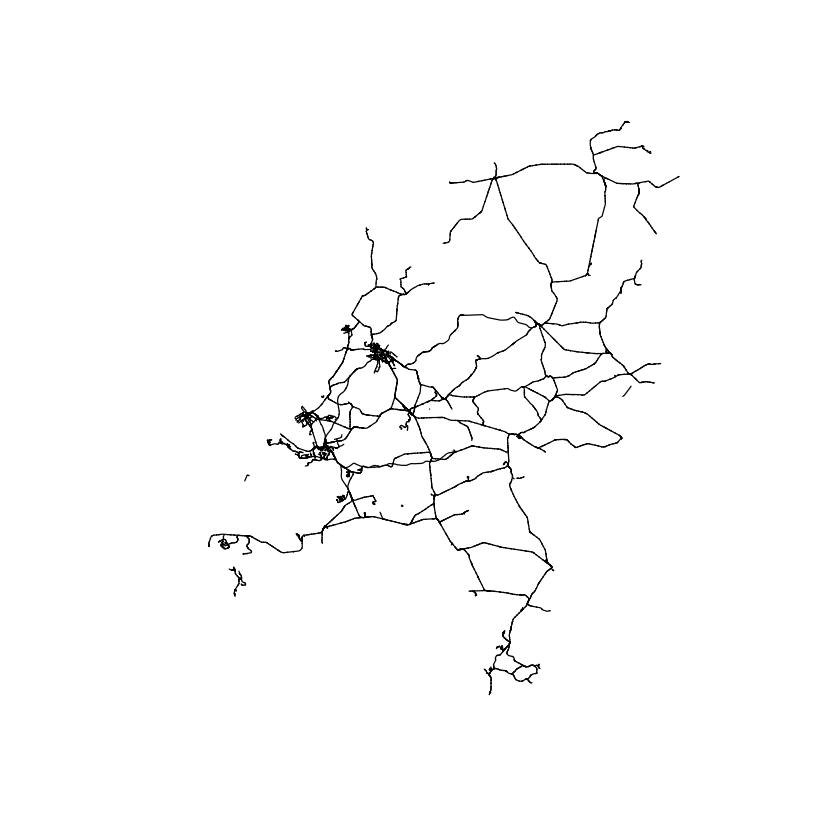

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”

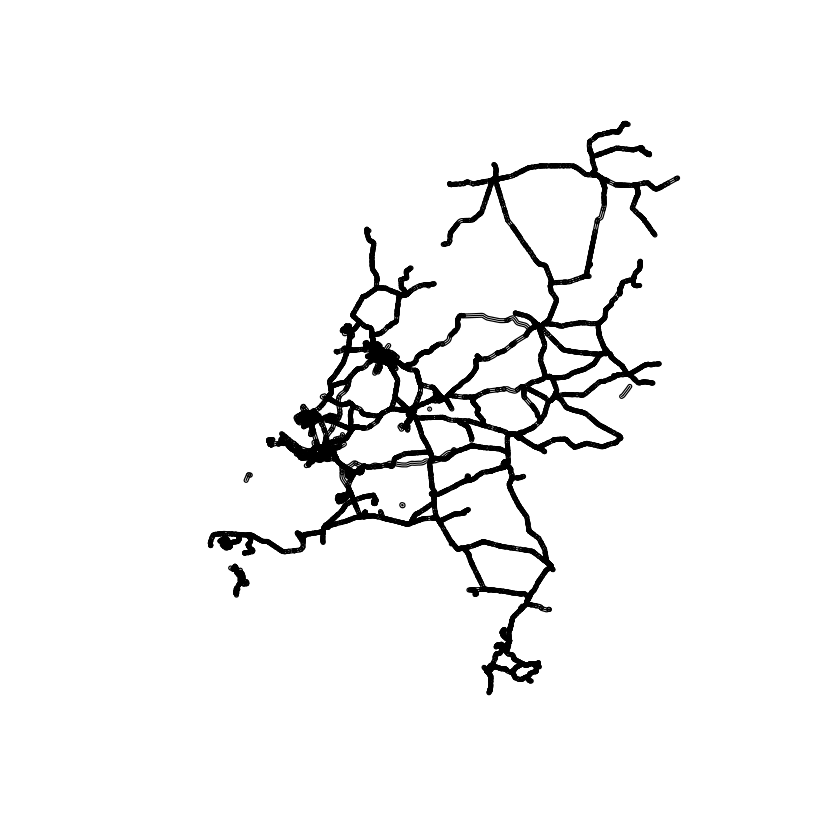

[1]  10000  10000  10000  10000  10000  10000  10000  65643  65643  65643
  [11]      0      0      0      0      0      0      0      0      0      0
  [21]      0      0      0      0      0      0      0      0      0      0
  [31]      0      0      0      0      0      0   1000   1000   1000   1000
  [41]   1000   1000   1000   1000   1000   1000   1000   1000   1000      0
  [51]      0      0      0      0      0      0      0      0      0      0
  [61]      0      0      0      0      0      0      0   1000   1000   1000
  [71]      0      0      0      0      0   1000   1000   1000   1000   1000
  [81]   1000   1000   1000   1000   1000   1000      0      0      0      0
  [91]      0      0      0      0      0      0      0      0      0      0
 [101]      0      0      0      0      0      0      0   1000   1000   1000
 [111]   1000   1000      0      0      0      0      0      0      0      0
 [121]      0      0      0      0      0      0      0      0      0      0
 [131]      0      0      0      0      0      0      0      0      0      0
 [141]      0      0      0      0      0      0      0      0      0      0
 [151]      0      0      0      0      0      0      0      0      0      0
 [161]   1000   1000   1000   1000   1000   1000   1000      0      0      0
 [171]   5000   5000   5000   5000   5000   5000   5000   5000   5000   5000
 [181]   5000   5000   5000   5000   5000   5000   5000   5000   5000      0
 [191]      0      0      0      0      0      0      0      0      0      0
 [201]      0      0      0      0      0      0      0      0      0      0
 [211]      0      0      0      0      0      0      0      0      0      0
 [221]      0      0      0      0      0      0      0      0      0      0
 [231]      0      0      0   1000   1000   1000   1000   1000   1000   1000
 [241]   1000   1000   1000   1000   1000   1000      0      0      0      0
 [251]      0      0      0      0      0 100000 100000 100000 100000 100000
 [261] 100000 100000 100000 100000 100000 100000 100000 100000 100000 100000
 [271] 100000 100000 100000 100000 100000 100000 100000 100000 100000 100000
 [281] 100000 100000 100000 100000 100000 100000 100000      0   1000   1000
 [291]   1000   1000   1000   1000   1000   1000   1000   1000  10000  10000
 [301]  10000      0      0      0      0      0      0      0      0      0
 [311]      0      0      0      0      0   5000   5000   5000   5000   5000
 [321]   5000   5000   5000   5000   5000   5000   5000   5000   5000   5000
 [331]   5000   5000   5000   5000      0      0      0      0      0      0
 [341]      0      0      0      0      0      0      0      0      0      0
 [351]      0      0      0      0      0      0      0      0      0      0
 [361]      0      0      0      0      0      0      0      0      0      0
 [371]      0      0      0      0      0      0      0      0      0      0
 [381]      0      0      0      0      0      0      0      0      0      0
 [391]      0      0      0      0      0      0      0      0      0      0
 [401]      0   1000   1000   1000   1000   1000   1000   1000   1000   1000
 [411]   1000  50000  50000  50000  50000  50000  50000  50000  50000  50000
 [421]  50000   5000   5000   5000   5000   5000   5000   5000   5000   5000
 [431]      0      0      0      0      0      0      0      0      0      0
 [441]      0      0      0      0      0      0      0      0      0      0
 [451]      0      0      0      0      0      0      0      0   1000   1000
 [461]   1000   1000   1000   1000   1000   1000   1000   1000   1000   1000
 [471]   1000   1000   1000   1000   1000   1000   1000   1000   1000   1000
 [481]   1000      0      0      0      0      0      0      0      0      0
 [491]      0      0      0      0      0      0      0      0      0      0
 [501]      0      0      0      0      0      0      0      0      0      0
 [511]      0      0      0      0      0      0      0      0      0      0

NULL

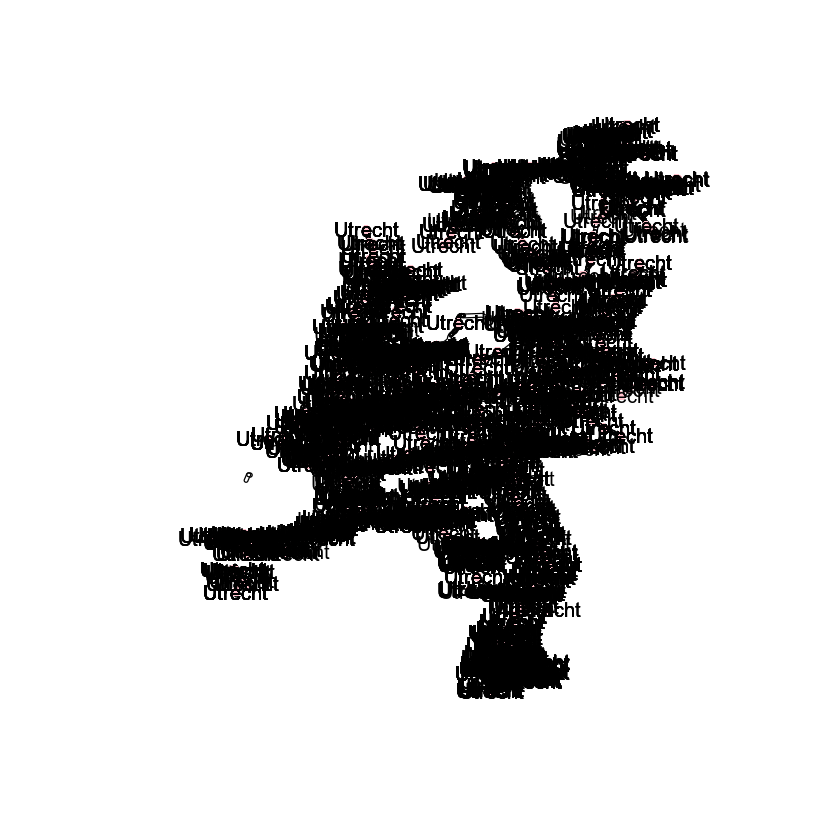

In [5]:
#At the very least, you MUST store the name of the city in the variable "city_name" and the population in 'city_pop', and your buffer 'railwaybuffer'


### BEGIN SOLUTION

# read in data
places <- st_read('data/places/places.shp')
railways <- st_read('data/railways/railways.shp')

# inspects crs of sf object and transforms it to the required crs if needed
transform_if_needed <- function(input_sf, dest_crs){
  if (st_crs(input_sf) != st_crs(dest_crs)){
    transformed <- st_transform(input_sf, crs = dest_crs)
    return(transformed)
  }
}

# transform crs if needed
railways_transformed <- transform_if_needed(railways, 28992)
places_transformed <- transform_if_needed(places, 28992)
 
# Select the "industrial" (type == "industrial") railways
industrial_rw <- railways_transformed[railways_transformed$type == "industrial"]
plot(st_geometry(industrial_rw))

# Buffer the "industrial" railways with a buffer of 1000m 
railwaybuffer <- st_buffer(industrial_rw, dist = 1000)
plot(st_geometry(railwaybuffer))
plot(st_geometry(industrial_rw), add = T)

# Find the place (i.e. a city) that intersects with this buffer
places_rw_intersect <- st_intersection(railwaybuffer, places_transformed)
#head(places_rw_intersect)

# Create a plot that shows the buffer, the points, and the name of the city
plot(st_geometry(railwaybuffer))
plot(st_geometry(places_rw_intersect), add = T, col = "Pink", pch = 16)
text(st_coordinates(places_rw_intersect[1]), labels = "Utrecht")

# name of the city and the population of that city
places_rw_intersect$population
places_rw_intersect$name.1
city_name="Utrecht"
# Utrecht
city_pop=100000

### END SOLUTION


In [8]:
#you this cell raises errors if you did something wrong, and has hidden tests for the right answer. Do not remove.

expect_type(city_name,'character')
expect_type(city_pop,'double')
expect_is(railwaybuffer,'data.frame')


### BEGIN HIDDEN TESTS

expect_true(city_name== "Utrecht")
expect_true(city_pop== 100000)

### END HIDDEN TESTS